In [19]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
y = np.array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2])
b = np.bincount(y)

In [9]:
b.argmax()

np.int64(2)

In [1]:
import os, sys
project_root = os.path.abspath('/Users/subhojit/workspace/saturn/src')
if project_root not in sys.path:
    sys.path.append(project_root)

from decision_tree import *

[1 1 1 0 1]


In [18]:
import numpy as np
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
iris = load_iris()
X = iris.data
y = iris.target

# setting for binary classification
X = X[y < 2]
y = y[y < 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

In [4]:
build_tree(X_train, y_train, max_depth=4)

y_pred = predict_dataset(X_test, tree)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on Iris (binary) test set:", accuracy)

Accuracy on Iris (binary) test set: 0.4666666666666667


In [9]:
wine = load_wine()
X = wine.data
y = wine.target
X.shape, y.shape


((178, 13), (178,))

In [12]:
y_binary = (y == 0).astype(int)
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.3, random_state=18)

In [17]:
tree = build_tree(X_train, y_train, max_depth=2, min_sample_split=5)

y_pred = predict_dataset(X_test, tree)

print("Accuracy on Wine test set:", accuracy_score(y_test, y_pred))


Accuracy on Wine test set: 0.9814814814814815


/Users/subhojit/workspace/saturn/.venv/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/subhojit/workspace/saturn/.venv/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/subhojit/workspace/saturn/.venv/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/var/folders/5g/d5t9nrnd47z7b7djysv3l9mm0000gq/T/ipykernel_78629/3100176144.py:20: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdBu, edgecolors='k', marker='x', label='Test')


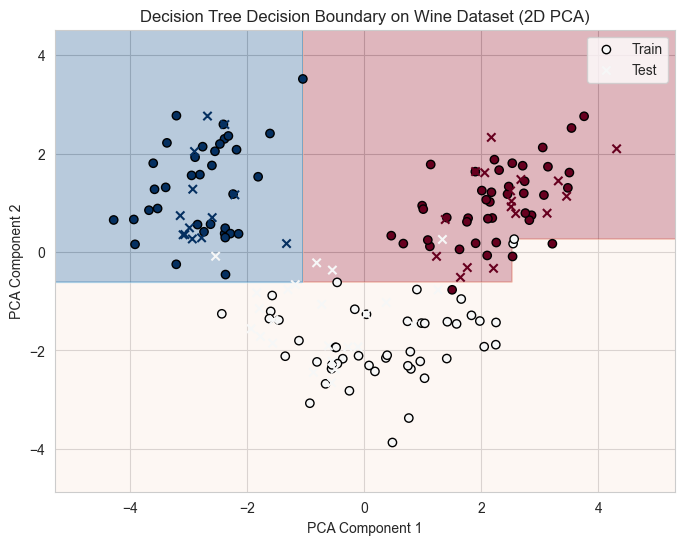

In [22]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.3, random_state=19)

tree = build_tree(X_train, y_train, max_depth=10, min_sample_split=5)

x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = predict_dataset(grid_points, tree)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolors='k', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdBu, edgecolors='k', marker='x', label='Test')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Decision Tree Decision Boundary on Wine Dataset (2D PCA)")
plt.legend()
plt.grid(True)
plt.show()